# **Course 3 Automatidata project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

You are the newest data professional in a fictional data consulting firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 3 End-of-course project: Exploratory data analysis

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs. 

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

<br/> 
Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# **Visualize a story in Tableau and Python**

# **PACE stages** 


<img src="images/Pace.png" width="100" height="100" align=left>

   *        [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
   *        [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
   *        [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
   *        [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

In this stage, consider the following questions where applicable to complete your code response:
1. Identify any outliers: 


*   What methods are best for identifying outliers?
    * Use a boxplot to visualize the distribution of the data
    * Use histogram to visualize the distribution of the data.
    * Use numpy functions to investigate the `mean()` and `median()` of the data.
*   How do you make the decision to keep or exclude outliers from any future models?

    * There are three main approaches for dealing with outliers: Keeping them as they are, deleting them, or reassigning them. To help make the decision as to what to do with outliers, the follow guideline can be employed:
        * Delete them: If you are sure the outliers are mistakes, errors or typos and the data will be used for modeling. Obvious outliers can skew the results of modeling and machine learning results.
        * Reassigning them: In the case of small dataset, this is better approach. Particulary if the dataset will be used training a machine learning model. ML models perform poorly(high bias) with small dataset. Hence its best approach to as many data points as possible. 
        * For dataset that is meant for EDA/analysis only, it is better to leave them.

### Task 1. Imports, links, and loading
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps. 

Link to supporting materials: 
Tableau Public: https://public.tableau.com/s/ 

For EDA of the data, import the data and packages that would be most helpful, such as pandas, numpy and matplotlib. 


In [46]:
# Import packages and libraries
#==> ENTER YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set_theme(style="white")

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
df = pd.read_csv('../data/2017_Yellow_Taxi_Trip_Data.csv')
df.rename(columns={"Unnamed: 0" : "trip_id"}, inplace= True)


<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: Analyze 

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### Task 2a. Data exploration and cleaning

Decide which columns are applicable

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set. Then answer these questions to yourself: 

Given our scenario, which data columns are most applicable? 
Which data columns can I eliminate, knowing they won’t solve our problem scenario? 

Consider functions that help you understand and structure the data. 

*    head()
*    describe()
*    info()
*    groupby()
*    sortby()

What do you do about missing data (if any)? 

Are there data outliers? What are they and how might you handle them? 

What do the distributions of your variables tell you about the question you're asking or the problem you're trying to solve?




In [3]:
df.columns


Index(['trip_id', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

==> ENTER YOUR RESPONSE HERE
* For the given scenario, `fare_amount`, and `trip_distance` are most applicable.
`trip_id`, `passenger_count`, `Store_and_fwd_flag`, `Extra`, `mta_tax`, `tolls_amount`, `tip_amount`, `improvement_surcharge` should be dropped as they won't contribute to solve our problem scenario.

* There are no missing data according to the results from `info()` function.

* There are two variables in the dataset that contain what appears to be outliers; `fare_amount` and `trip_distance`. Regarding the distribution of the `fare_amount` the maximum value ($1000) is much larger than the 25-75 percent range of values. Also, it is abnormal how there are negative value for `fare_amount`. For `trip_distance`, most of the value are between 1-3 miles however the maximum value is 33 miles. 

* The distribution of the `trip_distance` and `fare_amount` ranges from 1-3 miles and 6-14 dollars. There are outlier data

Start by discovering, using head and size. 

In [4]:
#==> ENTER YOUR CODE HERE
df.head()

,trip_id,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [5]:
#==> ENTER YOUR CODE HERE
df.size

408582

Use describe... 

In [6]:
#==> ENTER YOUR CODE HERE
df.describe()

,trip_id,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


And info. 

In [7]:
#==> ENTER YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_id                22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### Task 2b. Assess whether dimensions and measures are correct

On the data source page in Tableau, double check the data types for the applicable columns you selected on the previous step. Pay close attention to the dimensions and measures to assure they are correct. 

In Python, consider the data types of the columns. *Consider:* Do they make sense? 

Review the link provided in the previous activity instructions to create the required Tableau visualization. 

### Task 2c. Select visualization type(s)

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful? 

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


- Boxplot: Determine outliers. Perform a check for outliers on relevant columns such as `trip_distance` `duration` and `trip_duration`.
- Bar Chart: The bar chart will help determine average number of trips per month, weekday, weekend etc.
- Histogram: 
- Scatter plot: Association between `trip_distance`, `fare_amount` and `total_amount`
- A geoprahic map: Geographical locations
- Heat map: The concentration of ride and time.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: Construct 

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### Task 3. Data visualization

You’ve assessed your data, and decided on which data variables are most applicable. It’s time to plot your visualization(s)!


### Boxplots

Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, some of the best ways to identify the presence of outliers in data are box plots and histograms. 

**Note:** Remember to convert your date columns to datetime in order to derive total trip duration.  

In [8]:
df.head()

,trip_id,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [9]:
# Convert data columns to datetime
#==> ENTER YOUR CODE HERE
df[["tpep_pickup_datetime", "tpep_dropoff_datetime" ]] = df[["tpep_pickup_datetime", "tpep_dropoff_datetime" ]].apply(pd.to_datetime)

**trip distance**

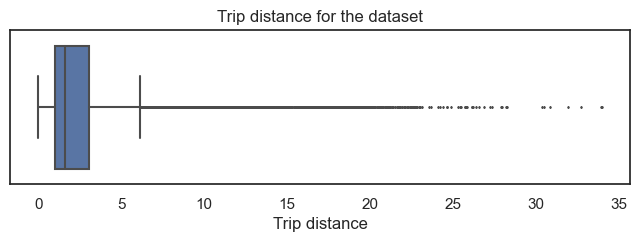

In [47]:
# Create box plot of trip_distance
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(8,2))
box = sns.boxplot(x=df["trip_distance"], fliersize=1)
plt.xlabel('Trip distance')
plt.title('Trip distance for the dataset');

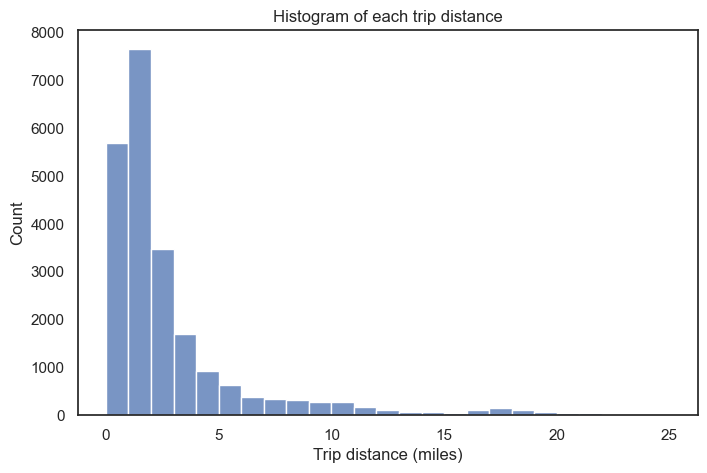

In [48]:
# Create histogram of trip_distance
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="trip_distance", bins=range(0, 26, 1));
plt.title("Histogram of each trip distance")
plt.xlabel("Trip distance (miles)");

* The majority of the trips were journeys less than two miles.The number of trips falls away steeply as the distance traveled increases beyond two miles.

**total amount**

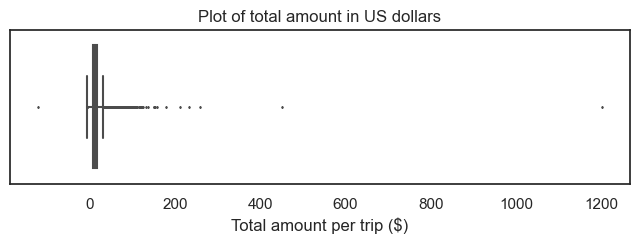

In [49]:
# Create box plot of total_amount
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(8,2))
box = sns.boxplot(x=df["total_amount"], fliersize=1)
plt.xlabel('Total amount per trip ($)')
plt.title('Plot of total amount in US dollars');

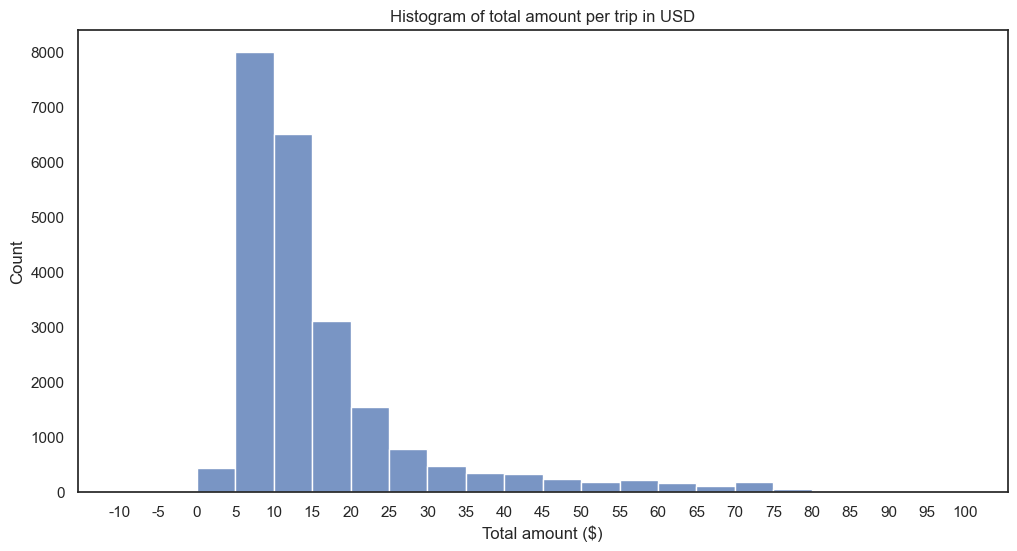

In [64]:
# Create histogram of total_amount
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,6))
ax = sns.histplot(df["total_amount"], bins=range(-10, 101, 5))
ax.set_xticks(range(-10, 101, 5))
ax.set_xticklabels(range(-10,101,5))
plt.title("Histogram of total amount per trip in USD")
plt.xlabel("Total amount ($)");

* The total cost of trip has a distribution skewed to the right, with most of the cost in the $5-15 range.

**tip amount**

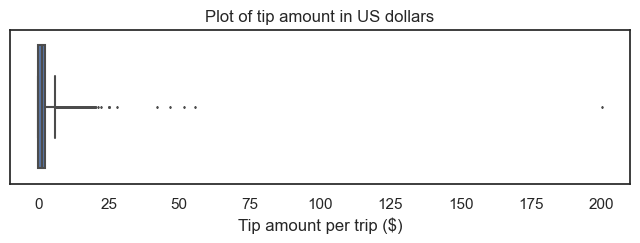

In [60]:
# Create box plot of tip_amount
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(8,2))
box = sns.boxplot(x=df["tip_amount"], fliersize=1)
plt.xlabel('Tip amount per trip ($)')
plt.title('Plot of tip amount in US dollars');

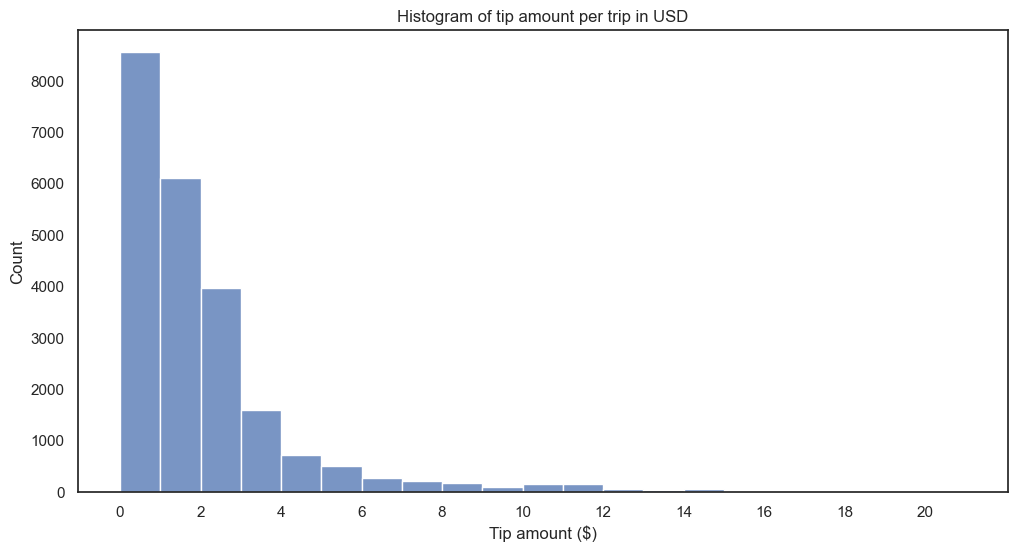

In [62]:
# Create histogram of tip_amount
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,6))
ax = sns.histplot(df["tip_amount"], bins=range(0, 22, 1))
ax.set_xticks(range(0, 22, 2))
ax.set_xticklabels(range(0,22,2))
plt.title("Histogram of tip amount per trip in USD")
plt.xlabel("Tip amount ($)");

**tip_amount by vendor**

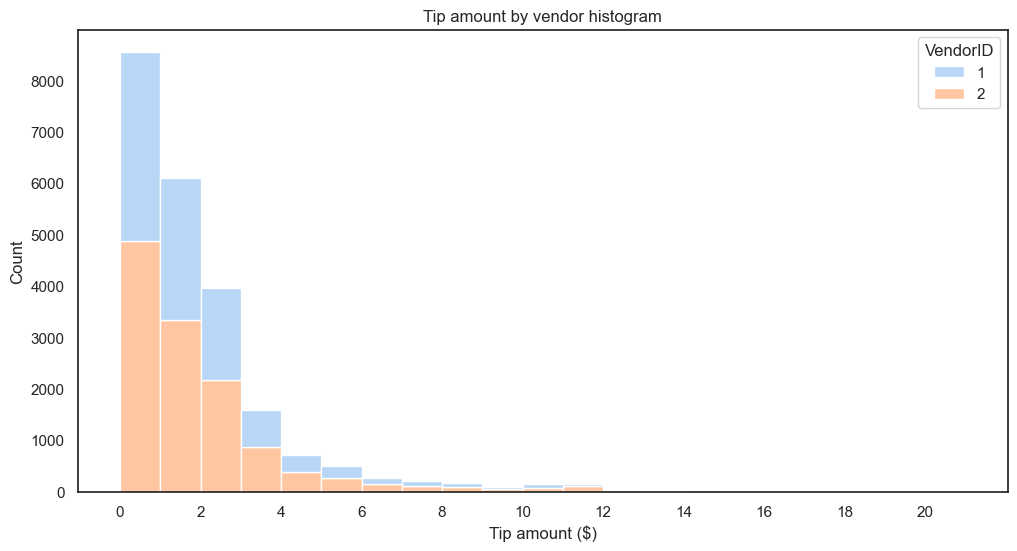

In [69]:
# Create histogram of tip_amount by vendor
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df, x="tip_amount", hue="VendorID", 
                  multiple="stack", bins=range(0, 22, 1), palette="pastel")
ax.set_xticks(range(0, 22, 2))
ax.set_xticklabels(range(0,22,2))
plt.title("Tip amount by vendor histogram")
plt.xlabel("Tip amount ($)");

* By seperating the tip amount by vendor shows that there no noticeable aberrations in the distribution of tips between the two vendors. Vendor 2 (`VeriFone Inc.`) has a slightly higher share of the rides and this proportion is approximately maintained for all tip amounts.

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

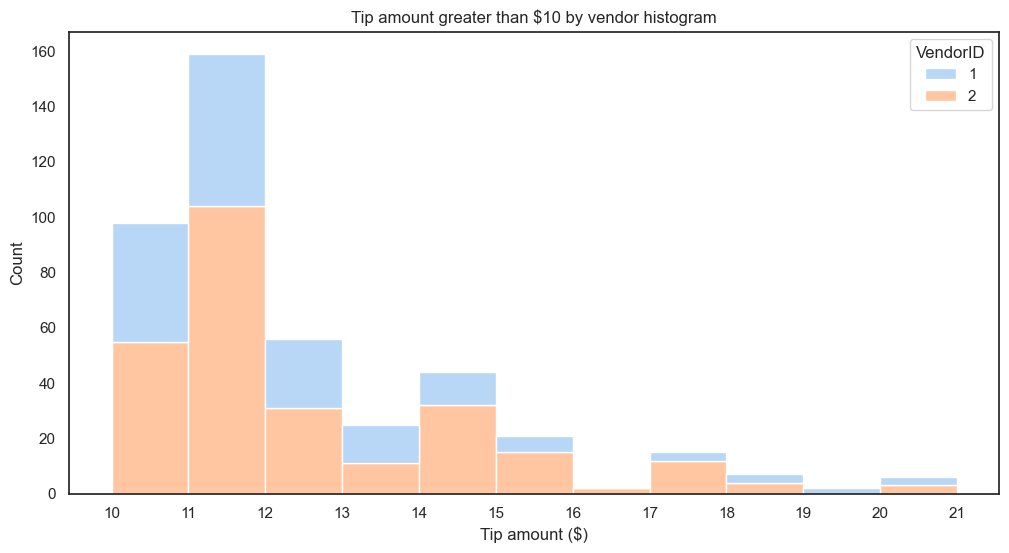

In [77]:
# Create histogram of tip_amount by vendor for tips > $10 
#==> ENTER YOUR CODE HERE
tip_greater_than_10 = df.query("tip_amount > 10")

plt.figure(figsize=(12,6))
ax = sns.histplot(data=tip_greater_than_10, x="tip_amount", hue="VendorID", 
                  multiple="stack", bins=range(10, 22, 1), palette="pastel")
ax.set_xticks(range(10, 22, 1))
ax.set_xticklabels(range(10,22,1))
plt.title("Tip amount greater than $10 by vendor histogram")
plt.xlabel("Tip amount ($)");

* The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [79]:
#==> ENTER YOUR CODE HERE
df["passenger_count"].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

* More than two third of the rides were single passenger, though there are still nearly 700 rides with size passengers. Also there are 33 rides with zero occupancy, which doesn't make sense. This would likely be dropped as an outlier.


In [113]:
# Calculate mean tips by passenger_count
#==> ENTER YOUR CODE HERE
mean_tips_by_passenger_count = df.groupby(["passenger_count"]).agg({"tip_amount": "mean"}).sort_values(by="tip_amount", ascending=False)
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
5,1.873185
2,1.856378
1,1.848920
6,1.720260
3,1.716768
4,1.530264


* Rides with five passengers have the highest average tips. We consider the trip with zero passenger as an anomaly.

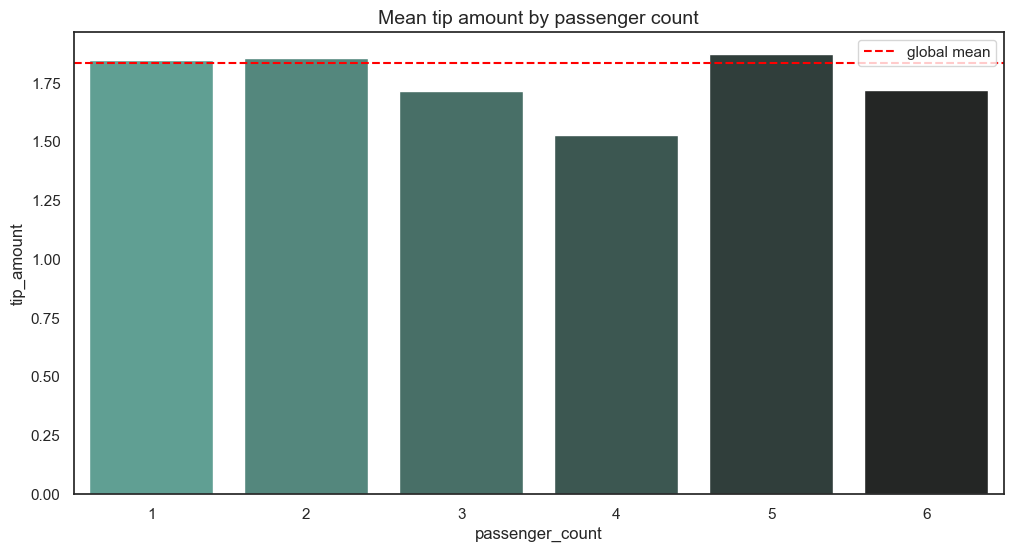

In [149]:
# Create bar plot for mean tips by passenger count
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,6))
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("dark:#5A9_r", len(data))
rank = data["tip_amount"].argsort()

ax = sns.barplot(x=data.index,
                y=data["tip_amount"],
                palette=np.array(pal[::-1])[rank]
                )
ax.axhline(df["tip_amount"].mean(), ls="--", color="red", label="global mean")
ax.legend()
plt.title("Mean tip amount by passenger count", fontsize=14);

* Mean tip amount varies very little by passenger count. It does drop noticeably for four-passenger rides. It is expected that there would be a high degree of fluctuation because rides with four passengers were the least number of rides in the dataset (aside from ridse with zero passengers)

**Create month and day columns**

In [156]:
# Create a month column
#==> ENTER YOUR CODE HERE
df["month"] = df["tpep_pickup_datetime"].dt.month_name()

# Create a day column
#==> ENTER YOUR CODE HERE
df["day"] = df["tpep_pickup_datetime"].dt.day_name()

**Plot total ride count by month**

Begin by calculating total ride count by month.

In [160]:
# Get total number of rides for each month
#==> ENTER YOUR CODE HERE
monthly_rides = df["month"].value_counts(ascending=False)
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

Reorder the results to put the months in calendar order.

In [164]:
# Reorder the monthly ride list so months go in order
#==> ENTER YOUR CODE HERE
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_rides= monthly_rides.reindex(index=month_order)
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

In [165]:
# Show the index
#==> ENTER YOUR CODE HERE
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

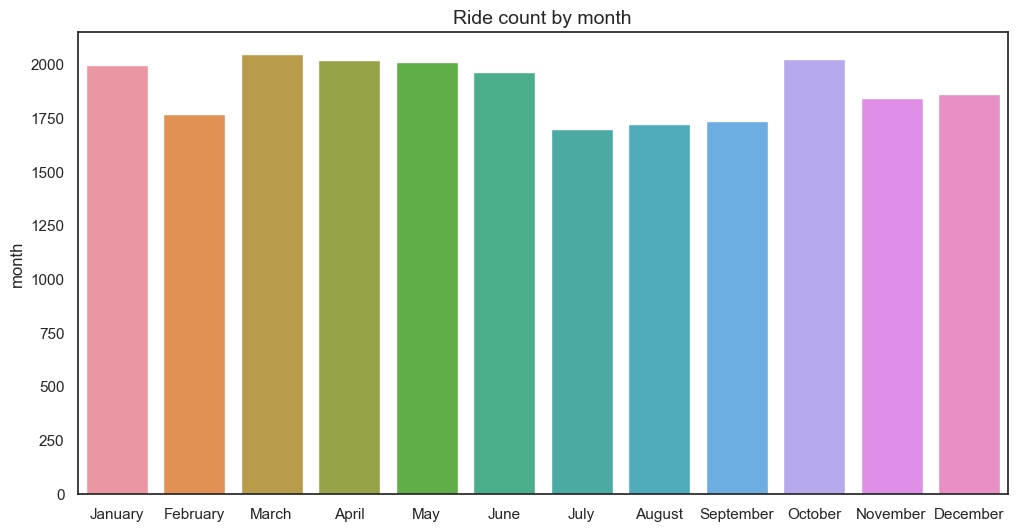

In [169]:
# Create a bar plot of total rides per month
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,6))
data = monthly_rides

ax = sns.barplot(x=data.index,y=data)
ax.set_xticklabels(month_order)

plt.title("Ride count by month", fontsize=14);

* The ride count by month are fairly consistent, with notably dips in the months of July, August and September. We can also observe a drop in February. 

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [174]:
# Repeat the above process, this time for rides by day
#==> ENTER YOUR CODE HERE
daily_rides = df["day"].value_counts(ascending=False)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_rides = daily_rides.reindex(index = day_order)
daily_rides

Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

In [223]:
def readable_numbers(x):
    """Takes large number and formats it to K and M readable"""
    if x >= 1e6:
        s = f"{x*1e-6:.2f}M"
    else:
        s = f"{x*1e-3:.2f}K"
    return s


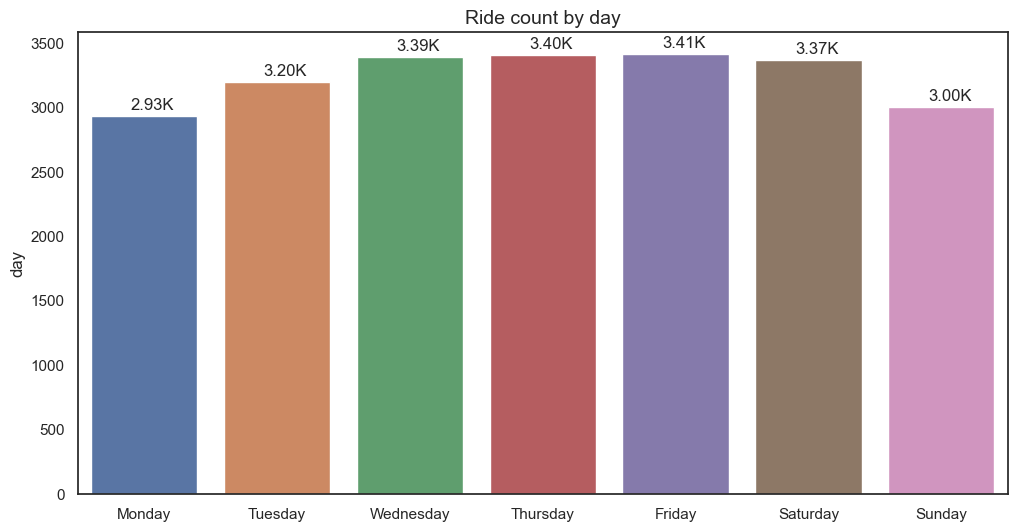

In [226]:
# Create bar plot for ride count by day
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,6))
data = daily_rides

ax = sns.barplot(x=data.index,y=data)

for i in range(len(data.index)):
        plt.text(i-.1, data[i] + 50,
                 data.apply(readable_numbers)[i],
                 fontsize=12
                )
        
ax.set_xticklabels(day_order)

plt.title("Ride count by day", fontsize=14);

* The daily ride counts are fairly consistent, with notable dips for Monday and Sunday. The highest ride count is observed for Friday with 3413 rides.

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [234]:
# Repeat the process, this time for total revenue by day
#==> ENTER YOUR CODE HERE

revenue_by_day = df.groupby(["day"]).agg({"total_amount" : "sum"})
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
revenue_by_day = total_revenue_by_day.reindex(index=day_order)
revenue_by_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


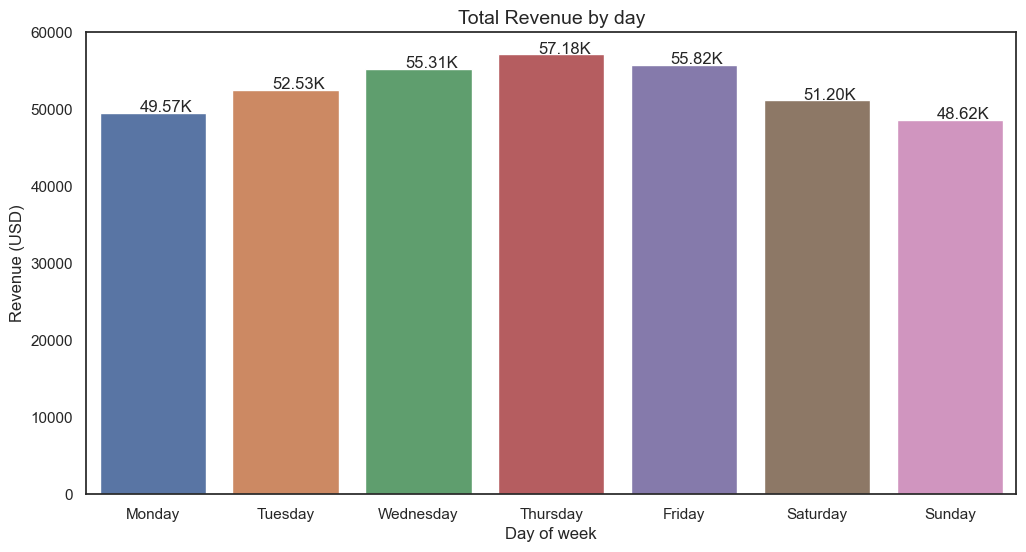

In [235]:
# Create bar plot of total revenue by day
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,6))
data = revenue_by_day

ax = sns.barplot(x=data.index, y=data["total_amount"])

for i in range(len(data.index)):
        plt.text(i-.1,data["total_amount"][i]+100,
                 data["total_amount"].apply(readable_numbers)[i],
                 fontsize=12
                )
        
ax.set_xticklabels(day_order)
ax.set_ylabel("Revenue (USD)")
ax.set_xlabel("Day of week")
plt.title("Total Revenue by day", fontsize=14);

* Thurday has the highest revenue of all days, and Sunday and Monday had the least. Although Saturday has only 35 fewer rides than Thurdays, there is a signicant different in the total revenue recorded (~$6000) less than Thurday. Friday which recorded the higest ride count also record less revenue compared to Thursday.

**Plot total revenue by month**

In [236]:
# Repeat the process, this time for total revenue by month
#==> ENTER YOUR CODE HERE
revenue_by_month = df.groupby(["month"]).agg({"total_amount": "sum"})
revenue_by_month = revenue_by_month.reindex(index=month_order)
revenue_by_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


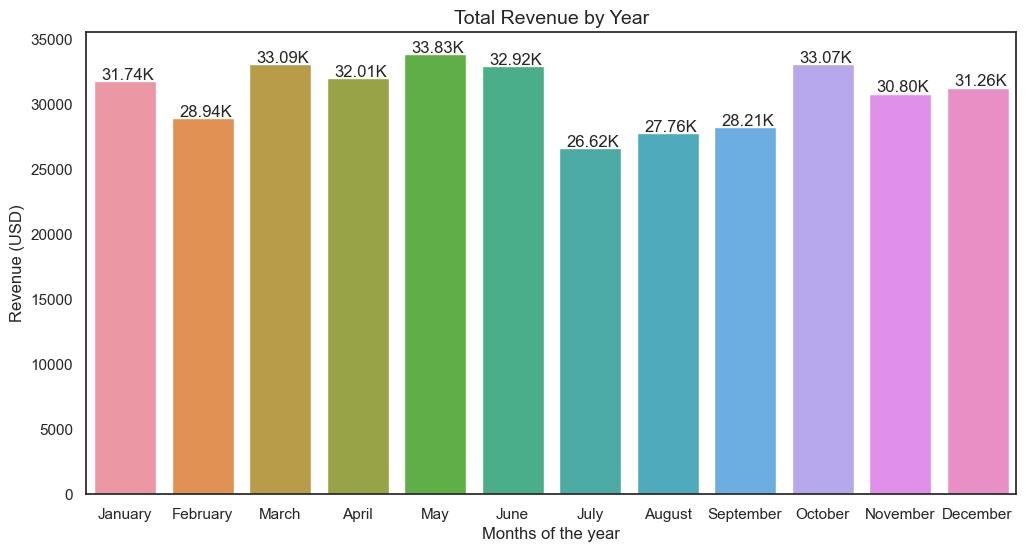

In [244]:
# Create a bar plot of total revenue by month
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,6))
data = revenue_by_month

ax = sns.barplot(x=data.index, y=data["total_amount"])

for i in range(len(data.index)):
        plt.text(i-.3,data["total_amount"][i]+100,
                 data["total_amount"].apply(readable_numbers)[i],
                 fontsize=12
                )
        
ax.set_xticklabels(month_order)
ax.set_ylabel("Revenue (USD)")
ax.set_xlabel("Months of the year")
plt.title("Total Revenue by Year", fontsize=14);

*  Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.



#### Scatter plot

You can create a scatterplot in Tableau Public, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the following link. Those instructions create a scatterplot showing the relationship between total_amount and trip_distance. Consider adding the Tableau visualization to your executive summary, and adding key insights from your findings on those two variables.

[Tableau visualization guidelines](https://docs.google.com/document/d/1pcfUlttD2Y_a9A4VrKPzikZWCAfFLsBAhuKuomjcUjA/template/preview)

**Plot mean trip distance by drop-off location**

In [249]:
# Get number of unique drop-off location IDs
#==> ENTER YOUR CODE HERE
df["DOLocationID"].nunique()

216

In [259]:
# Calculate the mean trip distance for each drop-off location
#==> ENTER YOUR CODE HERE
distance_by_dropoff = df.groupby("DOLocationID").agg({"trip_distance": "mean"})
# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by="trip_distance")
#==> ENTER YOUR CODE HERE
distance_by_dropoff

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


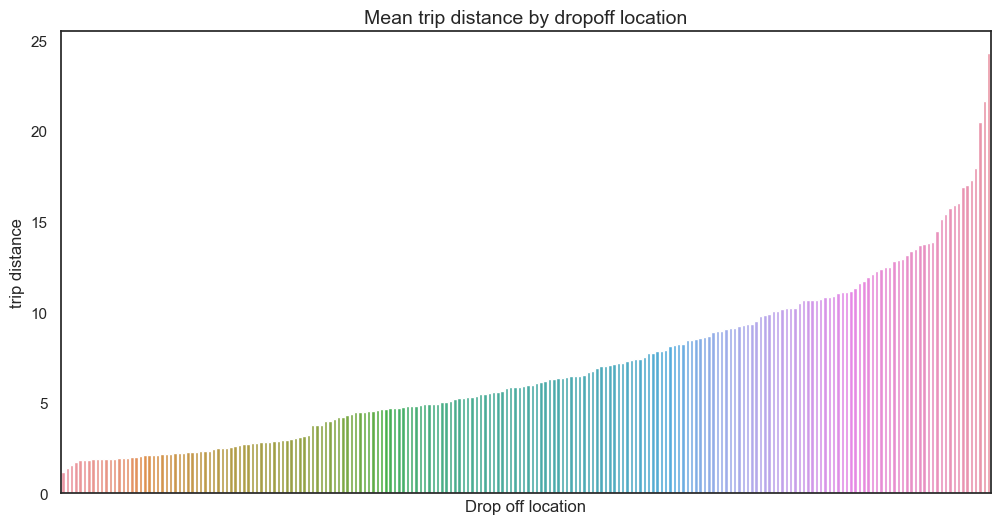

In [264]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,6))
data = distance_by_dropoff

ax = sns.barplot(x=data.index, y=data["trip_distance"], order=data.index)


ax.set_xticklabels([])
ax.set_xticks([])
ax.set_ylabel("trip distance")
ax.set_xlabel("Drop off location")
plt.title("Mean trip distance by dropoff location", fontsize=14);

* This plot represents a characteristic curve related to the cummulative density function of a normal distribution. In order words, it indicates that the drop-off points are relatively evenly distributed over the terrain.

## BONUS CONTENT

To confirm your conclusion, consider the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

[]

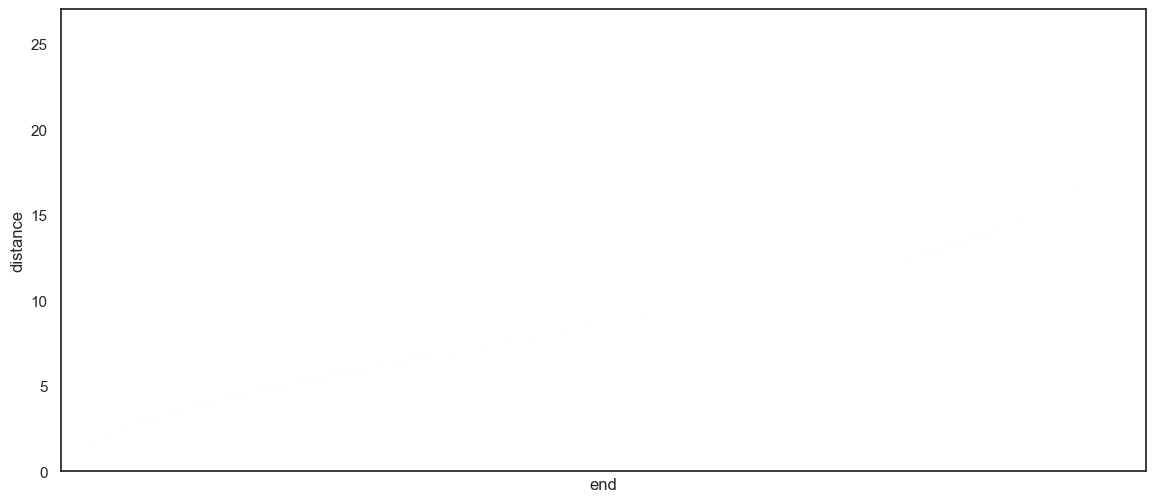

In [300]:
#BONUS CONTENT

#1. Generate random points on a 2D plane from a normal distribution
#==> ENTER YOUR CODE HERE
# Set the mean and standard deviation
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test)/2) 
start = test[:midway]     
end = test[midway:]  


# 2. Calculate Euclidean distances between points in first half and second half of array
#==> ENTER YOUR CODE HERE
distances = (start - end)**2
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)


# 3. Group the coordinates by "drop-off location", compute mean distance
#==> ENTER YOUR CODE HERE
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                   'end': [tuple(x) for x in end.tolist()],
                   'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
#==> ENTER YOUR CODE HERE
data
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data.index,
                 y=data['distance'],
                 order=data.index)
ax.set_xticklabels([])
ax.set_xticks([])
# ax.set_xlabel('Endpoint')
# ax.set_ylabel('Mean distance to all other points')
# ax.set_title('Mean distance between points taken randomly from normal distribution');

**Histogram of rides by drop-off location**

First, check to whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

In [303]:
# Check if all drop-off locations are consecutively numbered
#==> ENTER YOUR CODE HERE
df["DOLocationID"].max() - len(set(df["DOLocationID"]))

49

* There are 49 numbers that do not represent a drop-off location. 


To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

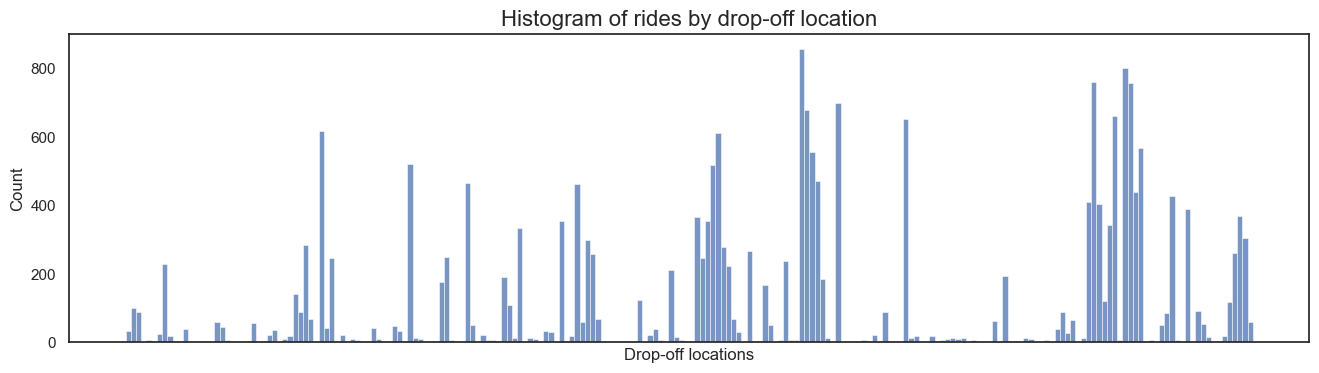

In [305]:
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
#==> ENTER YOUR CODE HERE
sorted_dropoffs = df["DOLocationID"].sort_values()
# Convert to string
#==> ENTER YOUR CODE HERE
sorted_dropoffs = sorted_dropoffs.astype("str")
# Plot
#==> ENTER YOUR CODE HERE
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

* Out of the over 200 drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips.

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: Execute 

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 4a. Results and evaluation

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue? 

***Pro tip:*** Put yourself in your client's perspective, what would they want to know? 

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible. 

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?



==> ENTER YOUR RESPONSE HERE

* I have learned the hightest distribution of trip distance are below 5 miles, but thre are outliers all the way out to 35 miles. There are no missing data.

* My other questions are: There are several trips that have a trip distnace of 0.0. What might those trips be? Will they impact our model? There are also 33 trips with zero passenger, what might those trips be?

* My client would likely want to know ... that the data includes dropoff and pickup times. We can use that infomation to derive a trip duration for each line of data.


In [328]:
#==> ENTER YOUR CODE HERE
df["trip_duration(mins)"]  = np.round((df["tpep_dropoff_datetime"] -
                        df["tpep_pickup_datetime"]).dt.total_seconds()/60, 2)
df["trip_duration(mins)"]
df.sort_values(by="trip_duration(mins)").head(5)


,trip_id,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration(mins)
9356,93542707,1,2017-11-05 01:23:08,2017-11-05 01:06:09,1,5.7,1,N,161,157,...,28.0,0.5,0.5,0.0,0.0,0.3,29.3,November,Sunday,-16.98
14062,25713867,1,2017-03-30 19:56:31,2017-03-30 19:56:31,3,0.0,1,N,113,264,...,2.5,0.5,0.5,0.0,0.0,0.3,3.8,March,Thursday,0.00
19838,80341574,1,2017-09-24 13:37:55,2017-09-24 13:37:55,1,0.0,1,N,234,264,...,2.5,0.0,0.5,0.0,0.0,0.3,3.3,September,Sunday,0.00
17270,20458610,1,2017-03-26 22:48:51,2017-03-26 22:48:51,1,0.0,1,N,170,264,...,2.5,0.5,0.5,0.0,0.0,0.3,3.8,March,Sunday,0.00
8889,25813,1,2017-01-07 22:48:08,2017-01-07 22:48:08,1,0.0,1,N,229,264,...,2.5,0.5,0.5,0.0,0.0,0.3,3.8,January,Saturday,0.00


* The data includes a trip with negative `duration` in minutes. This doesn't make sense. There are also several trip with zero duration in minutes yet either their `trip_distance` or `fare_amount` is greater than zero. What might those trips be?

In [330]:
#==> ENTER YOUR CODE HERE
df.head(10)

,trip_id,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration(mins)
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,14.07
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,26.50
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,7.20
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,30.25
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,16.72
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,8.00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday,59.63
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday,21.98
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday,12.12
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday,20.43


### Task 4b. Conclusion
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? Why are the data visualizations provided in this notebook useful?



EDA is important because ... 
==> ENTER YOUR RESPONSE HERE
* *EDA helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.* 

Visualizations helped me understand ..
==> ENTER YOUR RESPONSE HERE
* *That this dataset has some outliers that we will need to make decisions on prior to designing a model.* 

You’ve now completed professional data visualizations according to a business need. Well done! 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.